# Medzy

## Overview

This project aims to develop a machine learning model capable of interpreting doctors’ handwriting on prescriptions. By accurately detecting and translating challenging handwriting, the model will empower patients to read their prescriptions independently, making it easier for them to purchase their medications without confusion if they run out of medecine.

This model will use Tensor flows' keras convolutional neural network as reference to this <a href = "https://www.tensorflow.org/tutorials/images/cnn">documentation</a>

## Importing needed libraries

In [1]:
# basic python libraries
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import glob
import cv2

# data preprocessing libraries
from sklearn.preprocessing import LabelEncoder

# tensor flow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall

# Fine tuning libraries
import keras_tuner

## Importing the Data

### Train data

#### Train Labels

In [2]:
train_path = ".\\Dataset\\archive\\Doctor’s Handwritten Prescription BD dataset\\Training"
train_labels = pd.read_csv(os.path.join(train_path,"training_labels.csv"), delimiter = ",")

In [3]:
train_labels.head()

,IMAGE,MEDICINE_NAME,GENERIC_NAME
0,0.png,Aceta,Paracetamol
1,1.png,Aceta,Paracetamol
2,2.png,Aceta,Paracetamol
3,3.png,Aceta,Paracetamol
4,4.png,Aceta,Paracetamol


##### Encode the medecine name

In [4]:
medicine_enc = LabelEncoder()
train_name_enc = to_categorical(medicine_enc.fit_transform(train_labels["MEDICINE_NAME"]), num_classes=78)
# train_labels["MEDICINE_NAME_ENC"] = train_name_enc

In [5]:
len(train_labels["MEDICINE_NAME"].unique())

78

after encoding there are 78 unique values/medicines since we are using label encoder, we will put them all in to a seperate column

#### Train Images

In [6]:
#function for grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [7]:
train_images = []
train_files = glob.glob(".\\Dataset\\archive\\Doctor’s Handwritten Prescription BD dataset\\Training\\training_words\\*.png")
for picture in train_files:
    image = Image.open(picture).convert("L").resize((600, 200))
    train_images.append(image)
    
    # plt.imshow(image, cmap = "gray")
    # plt.show()
train_images = np.array(train_images)/255

In [8]:
print("Dataset shape:", train_images.shape)
print("Labels shape:", train_labels.shape) 

Dataset shape: (3120, 200, 600)
Labels shape: (3120, 3)


##### Check if it is correct

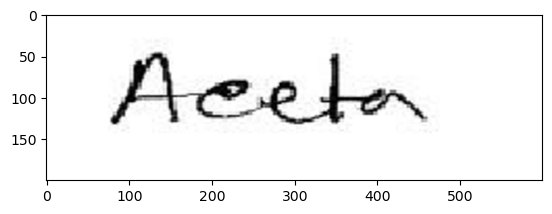

In [9]:
plt.imshow(train_images[0], cmap = "gray")

In [10]:
print("Example label:", train_labels.iloc[0])

Example label: IMAGE                  0.png
MEDICINE_NAME          Aceta
GENERIC_NAME     Paracetamol
Name: 0, dtype: object


### Validation data

#### validation Labels

In [11]:
validation_path = ".\\Dataset\\archive\\Doctor’s Handwritten Prescription BD dataset\\Validation"
validation_labels = pd.read_csv(os.path.join(validation_path,"validation_labels.csv"), delimiter = ",")

In [12]:
validation_labels.head()

,IMAGE,MEDICINE_NAME,GENERIC_NAME
0,0.png,Aceta,Paracetamol
1,1.png,Aceta,Paracetamol
2,2.png,Aceta,Paracetamol
3,3.png,Aceta,Paracetamol
4,4.png,Aceta,Paracetamol


##### Encode the medecine name

In [13]:
validation_name_enc = to_categorical(medicine_enc.transform(validation_labels["MEDICINE_NAME"]), num_classes=78)
# validation_labels["MEDECINE_NAME_ENC"] = validation_name_enc

In [14]:
len(validation_labels["MEDICINE_NAME"].unique())

78

#### Validation Images

In [15]:
#function for grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [16]:
validation_images = []
validation_files = glob.glob(".\\Dataset\\archive\\Doctor’s Handwritten Prescription BD dataset\\Validation\\validation_words\\*.png")
for picture in validation_files:
    image = Image.open(picture).convert("L").resize((600, 200))
    validation_images.append(image)
    
    # plt.imshow(image, cmap = "gray")
    # plt.show()
validation_images = np.array(validation_images)/255

In [17]:
print("Dataset shape:", validation_images.shape)
print("Labels shape:", validation_labels.shape)

Dataset shape: (780, 200, 600)
Labels shape: (780, 3)


##### Check if it is correct

In [18]:
validation_images[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

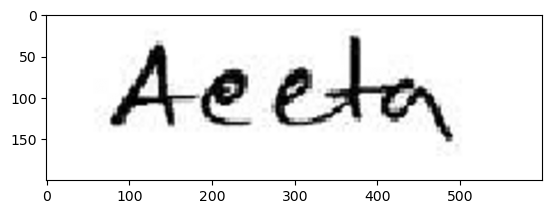

In [19]:
plt.imshow(validation_images[0], cmap = "gray")

In [20]:
print("Example label:", validation_labels.iloc[0])

Example label: IMAGE                  0.png
MEDICINE_NAME          Aceta
GENERIC_NAME     Paracetamol
Name: 0, dtype: object


### Test data

#### Test Labels

In [21]:
test_path = ".\\Dataset\\archive\\Doctor’s Handwritten Prescription BD dataset\\Testing"
test_labels = pd.read_csv(os.path.join(test_path,"testing_labels.csv"), delimiter = ",")

In [22]:
test_labels.head()

,IMAGE,MEDICINE_NAME,GENERIC_NAME
0,0.png,Aceta,Paracetamol
1,1.png,Aceta,Paracetamol
2,2.png,Aceta,Paracetamol
3,3.png,Aceta,Paracetamol
4,4.png,Aceta,Paracetamol


##### Encode the medecine name

In [23]:
test_name_enc = to_categorical(medicine_enc.transform(test_labels["MEDICINE_NAME"]), num_classes=78)
# test_labels["train_medecine_name_enc"] = test_name_enc

In [24]:
len(test_labels["MEDICINE_NAME"].unique())

78

#### Testing Images

In [25]:
#function for grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [26]:
test_images = []
test_files = glob.glob(".\\Dataset\\archive\\Doctor’s Handwritten Prescription BD dataset\\Validation\\validation_words\\*.png")
for picture in test_files:
    image = (Image.open(picture).convert("L").resize((600, 200))) #devide to normalize to 0 until 1
    test_images.append(image)
    
    # plt.imshow(image, cmap = "gray")
    # plt.show()
test_images = np.array(test_images)/255

In [27]:
print("Dataset shape:", test_images.shape)
print("Labels shape:", test_labels.shape) 

Dataset shape: (780, 200, 600)
Labels shape: (780, 3)


##### Check if it is correct

In [28]:
test_images[0].shape

(200, 600)

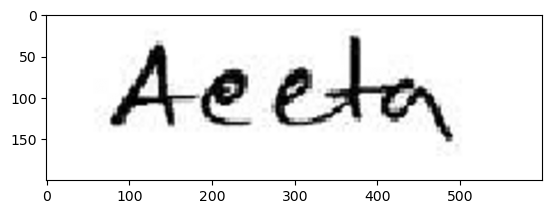

In [29]:
plt.imshow(test_images[0], cmap = "gray")

In [30]:
print("Example label:", test_labels.iloc[0])

Example label: IMAGE                  0.png
MEDICINE_NAME          Aceta
GENERIC_NAME     Paracetamol
Name: 0, dtype: object


## Building the artificial neural network

#### Getting the shape of the input

In [31]:
train_images[0].shape

(200, 600)

#### Make a model create function

In [32]:
# y = layers.Conv2D()

##### Parameters for the model

In [33]:
#number of classes to determine how many neurons are in the output layer
num_classes = len(train_labels["MEDICINE_NAME"].unique())
num_classes

78

In [34]:
#the image size to determine the shape for the convolutional neural network to scan
train_images[0].shape

(200, 600)

#### Create a model builder for gridsearch

the even filter shapes aren't recommended because it lacks the ability to devide the previous layer pixels arould the output pixel <a hre = "https://medium.com/analytics-vidhya/how-to-choose-the-size-of-the-convolution-filter-or-kernel-size-for-cnn-86a55a1e2d15">(Pandey, 2020)</a>.

<a href = "https://medium.com/@nerdjock/convolutional-neural-network-lesson-9-activation-functions-in-cnns-57def9c6e759">Machine Learning in Plain English (2023)</a> The most common activation functions are "relu" and "leaky relu" therefore we would pass it in the grid search.

Max pooling excells in image classification, due to how max pooling captures the most prominent features and reduce the variance of the input <a href = "https://www.linkedin.com/advice/1/how-do-you-choose-appropriate-pooling-method-2uvmc#adaptive-pooling">(Awad et. al, n.d.)</a>.

In [35]:
def create_model(hp):
    input_shape = (200, 600, 1)
    model = Sequential()
    metrics = ['accuracy', 
            Precision(name = 'precision'),
            Recall(name = 'recall')]
    
    #input layer. The shape of the input layer must be huge to scale down the image. Ideally (5x5) or (7x7)
    model.add(layers.Conv2D(filters = hp.Choice("input_filter", [32, 64, 128, 256]),
                            kernel_size = hp.Choice("input_kernel_size", [3,5]),
                            activation = hp.Choice("input_activation", ["relu", "leaky_relu"]),
                            input_shape = input_shape))
    model.add(layers.MaxPooling2D(pool_size=2))
    
    #Convolutional layer
    for i in range(hp.Choice("n_conv_layers", [1,3])):
        model.add(layers.Conv2D(filters = hp.Choice(f"conv_filter_{i}", [32, 64, 128, 256]),
                            kernel_size = hp.Choice(f"conv_kernel_size_{i}", [3,5]),
                            activation = hp.Choice(f"conv_activation_{i}", ["relu", "leaky_relu"])))
        if i < 1:
            model.add(layers.MaxPooling2D(pool_size=2))
        
    #Flatten the resulted image so that the dense layer could extract the patterns and categorize it
    model.add(layers.Flatten())
    
    #Building the dense layers
    for i in range(hp.Int("n_dense_layer",1,7,step = 1, default = 1)):
        model.add(layers.Dense(hp.Choice(f"n_neurons_dense_{i}", [32, 64, 128, 256, 512, 1024]), 
                            activation = hp.Choice(f"dense_activation{i}", ["relu", "leaky_relu"])))
        
    #Output layer
    #there are 78 classes in the output layer so we will take 78 neurons to classify it
    model.add(layers.Dense(78, activation = "softmax"))
    
    model.compile(optimizer = hp.Choice(f"optimizer", ['Adam', "Adagrad", 'Adamax', 'Adadelta', 'SGD']), metrics = metrics, loss = "categorical_crossentropy")
    
    return model

In this project, a hyperband gridsearch will be used since the hyperband tuner will stop training the model if the accuracy is low on the validation data <a href = "https://medium.com/analytics-vidhya/automated-hyperparameter-tuning-with-keras-tuner-and-tensorflow-2-0-31ec83f08a62#:~:text=Overview%20of%20available%20Keras%20Tuners,Tuners%20available%2C%20as%20of%20now.&text=The%20basic%20and%20least%20efficient,from%20a%20search%20space%20randomly.&text=A%20Hyperband%20tuner%20is%20an,accuracy%20on%20the%20validation%20set.&text=Bayesian%20Optimization%20works%20the%20same,Keras%20Tuner%20with%20the%20Documentation.">(Bag, 2021)</a>. 

In [ ]:
tuner = keras_tuner.Hyperband(
    hypermodel = create_model,
    objective="val_accuracy",
    max_epochs=500,
    factor = 3,
    hyperband_iterations=1, #the number of itterations that the model will go trough the hyperband algorithm
    seed = 42, #for reproducibility
    distribution_strategy = tf.distribute.MirroredStrategy(), # this is to speed up the process by distributing the load for computation (only for gpu)
    directory = "model_train_log", #to store logs on the trial results
    project_name = "medzy"
)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


#### Start the grid search

In [ ]:
validation_steps = len(validation_images) #the number of validation for number of batches

tuner.search(
    train_images,
    train_name_enc,
    epochs = 500,
    validation_data = (validation_images, validation_name_enc), #data used to evaluate the model after each epoch
    validation_steps = validation_steps, #number of batches used for validation
    callbacks = [keras.callbacks.EarlyStopping("val_accuracy")]
)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |input_filter
3                 |3                 |input_kernel_size
relu              |relu              |input_activation
1                 |1                 |n_conv_layers
256               |256               |conv_filter_0
3                 |3                 |conv_kernel_size_0
leaky_relu        |leaky_relu        |conv_activation_0
1                 |1                 |n_dense_layer
128               |128               |n_neurons_dense_0
relu              |relu              |dense_activation0
SGD               |SGD               |optimizer
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
5                 |5                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
